**Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек**.

Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и *какие гипотезы на ее основе можно выдвинуть*.

**Откуда брать данные?**

Можно взять свой датасет (тогда не забудьте его выложить на github вместе с ноутбуком) или воспользоваться любым понравившемся из открытых источников (например, [kaggle.com](https://www.kaggle.com/)). Если идей нет, можете взять один из перечисленных ниже:

* [Данные IMDB](https://www.kaggle.com/tmdb/tmdb-movie-metadata);
* [Данные NYC](https://www.kaggle.com/c/nyc-taxi-trip-duration);
* [Данные NBA](https://www.kaggle.com/drgilermo/nba-players-stats).

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
import numpy as np

In [112]:
trips = pd.read_csv(
    'nyc_taxi_train1.csv')
trips

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
98056,id0716574,2,2016-05-28 02:39:28,2016-05-28 02:45:25,4,-73.968033,40.680462,-73.947769,40.679626,N,357
98057,id1733959,2,2016-05-25 23:47:31,2016-05-26 00:00:15,1,-73.988762,40.744720,-73.960648,40.778099,N,764
98058,id2575365,2,2016-06-04 23:43:07,2016-06-04 23:54:08,2,-73.939949,40.708241,-73.909363,40.689308,N,661
98059,id3453272,2,2016-06-14 22:21:49,2016-06-14 22:28:07,1,-73.973122,40.761452,-73.963783,40.765911,N,378


**Диаграмма 1**. Зависимость времени поездки от количества пассажиров такси \
Гипотеза: с увеличением количества пассажиров длительность поездки увеличивается (исключение - 4 пассажира)

Text(0, 0.5, 'duration (sec.)')

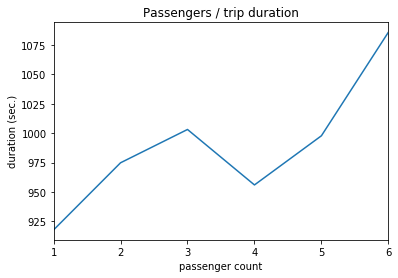

In [54]:
trips_pass = trips.groupby('passenger_count')['trip_duration'].mean()
trips_pass = trips_pass.loc[(trips_pass.index.get_level_values(0) != 0)]
diag = trips_pass.plot()
diag.set_title('Passengers / trip duration')
diag.set_xlabel('passenger count')
diag.set_ylabel('duration (sec.)')

**Диаграмма 2**. Зависимость длины поездки от времени суток в момент начала поездки \
Гипотеза: Длина поездки макисальна при посадке рано утром, пассажиры направялются на работу в центр города из дальних районов.

In [99]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

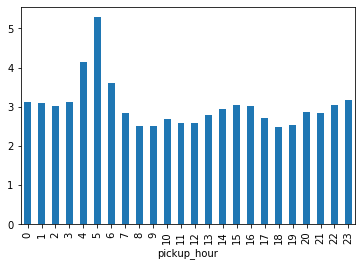

In [118]:
trips['dist'] = haversine(trips.pickup_longitude, trips.pickup_latitude, trips.dropoff_longitude, trips.dropoff_latitude)
trips['pickup_hour'] = pd.to_datetime(trips['pickup_datetime'], format='%Y-%m-%d %H:%M:%S').dt.hour
trips_day = trips[['pickup_hour', 'dist']]
trips_day = trips_day.groupby('pickup_hour')['dist'].mean()
trips_day.plot(kind='bar')

**Диаграмма 3**. Зависимость цены авокадо от региона США за последние несколько лет \
Гипотеза: стоимость авокадо растет со временем под влиянием инфляции. Ответ нет - пик стоимости был в 2017, после чеого она снизилась в целом по стране.

In [100]:
av = pd.read_csv('avocado.csv')
av
# av['year'] = pd.to_datetime(av['Date'], format='%Y-%m-%d').dt.year
# av_groupped = av.groupby(['region', 'year'])['AveragePrice'].mean().reset_index()
# av_groupped

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [88]:
avocado_sales = av_groupped.pivot_table(
                        index='region', 
                        columns='year', 
                        values='AveragePrice', 
                        aggfunc='mean').fillna(0).applymap(float)
# avocado_sales

In [67]:
import seaborn as sns

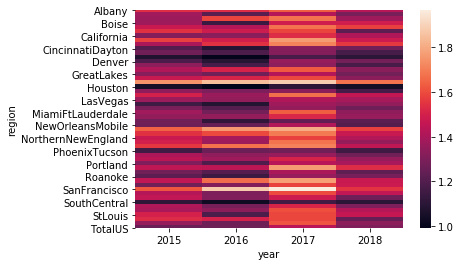

In [68]:
ax = sns.heatmap(avocado_sales)

**Диаграмма 4**. Стоимость органических авокадо \
Гипотеза: органические авокадо по стоимости выше, чем традиционные.

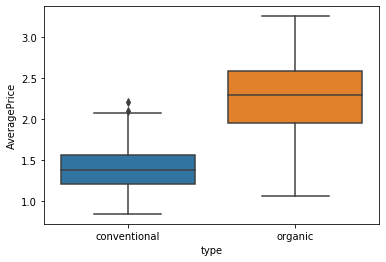

In [87]:
ax = sns.boxplot(x="type", y="AveragePrice", 
            data=av[av.region == 'SanFrancisco'])

**Диаграмма 5**. Стоимость авокадо \
Гипотеза: продажи авокадо выше на западе США.

In [96]:
pip install plotly==4.6.0

Note: you may need to restart the kernel to use updated packages.


In [97]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [126]:
av = pd.read_csv('avocado.csv')
av
av_price = av.groupby(['region'])[['AveragePrice']].mean()
av_sales = av.groupby(['region'])[['Total Volume']].sum()
av_bag_sales = av.groupby(['region'])[['Total Bags']].sum()


regions_df = av_price.join(av_sales)
regions_df = regions_df.join(av_bag_sales)

regions_df = regions_df.loc[regions_df.index != 'TotalUS']

regions_df.sort_values('Total Volume', ascending = False).head()

,AveragePrice,Total Volume,Total Bags
region,,,
West,1.272219,1.086779e+09,3.670736e+08
California,1.395325,1.028982e+09,2.466822e+08
SouthCentral,1.101243,1.011280e+09,2.333924e+08
Northeast,1.601923,7.132809e+08,1.969884e+08
Southeast,1.398018,6.152384e+08,1.815276e+08


In [128]:
trace0 = go.Scatter(
    x=regions_df['Total Volume'],
    y=regions_df['AveragePrice'],
    mode = 'markers+text',
    text = regions_df.index,
    textposition='bottom center'
)

data = [trace0]
layout = {'title': 'Avocado sales', 'yaxis': {'title': 'Average Price'}, 
          'xaxis': {'title': 'Total Volume'}}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)